# PANDAS WITH TED TALK DATA

In [314]:
import numpy as np
import numba
import pandas as pd
import ast                             # Abstract Syntax Tree 

In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def print_info_arr(arr):
    print('number of elements:', arr.size)
    print('number of dimensions:', arr.ndim)
    print('shape:', np.unravel_index(np.argmax(arr), arr.shape))
    print('data type:',arr.dtype)
    print('strides:', arr.strides)
    print('flags:')
    print(arr.flags)
    print('memory location:', arr.data)

In [5]:
pd.__version__

'0.25.3'

In [6]:
print("matplotlib stype available:\n\n{}".format(plt.style.available))

matplotlib stype available:

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [7]:
mpl.style.use(['fivethirtyeight'])
print("Using style of 'fivethirtyeight' to plot")

Using style of 'fivethirtyeight' to plot


In [8]:
ted = pd.read_csv('ted.csv')

In [17]:
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [10]:
ted.shape

(2550, 17)

In [11]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [14]:
ted.isna().sum()                # used .isna() & .notna() instead of .isnull() & notnull() to align with .fillna() & .dropna()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

##### BEST PRACTICE: used .isna( ) & .notna( ) instead of .isnull( ) & notnull( ) to align with .fillna( ) & .dropna( )

## Which talks provoke the most online discussion?

In [18]:
ted['comments'].max()

6404

In [20]:
ted['comments'].values.argmax()

96

In [21]:
ted.iloc[96]

comments                                                           6404
description           Richard Dawkins urges all atheists to openly s...
duration                                                           1750
event                                                           TED2002
film_date                                                    1012608000
languages                                                            42
main_speaker                                            Richard Dawkins
name                                  Richard Dawkins: Militant atheism
num_speaker                                                           1
published_date                                               1176689220
ratings               [{'id': 3, 'name': 'Courageous', 'count': 3236...
related_talks         [{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...
speaker_occupation                               Evolutionary biologist
tags                  ['God', 'atheism', 'culture', 'religion', 

In [24]:
ted.sort_values('comments').tail(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [25]:
ted['comment_per_view'] = ted['comments'] / ted['views']

In [26]:
ted.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comment_per_view
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083


In [30]:
ted['comment_per_view'].sort_values().tail(3)

96     0.001464
803    0.001534
744    0.002220
Name: comment_per_view, dtype: float64

In [31]:
ted.sort_values('comment_per_view').tail(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comment_per_view
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [32]:
ted['view_per_comment'] = ted['views'] / ted['comments']

In [33]:
ted.sort_values('view_per_comment').head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comment_per_view,view_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291


## Visualize the distribution of comments

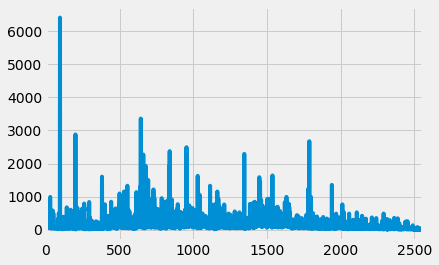

In [50]:
ted['comments'].plot()
plt.show()

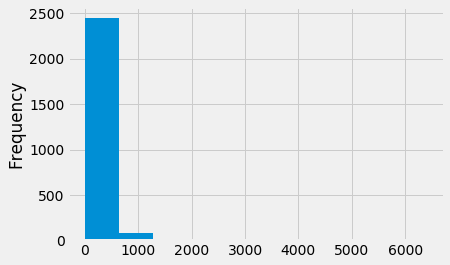

In [63]:
ted['comments'].plot(kind = 'hist')
plt.show()

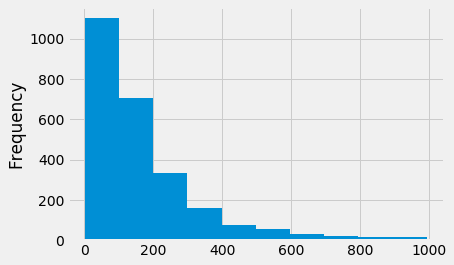

In [62]:
ted[ted['comments'] < 1000]['comments'].plot(kind = 'hist')
plt.show()

In [65]:
ted[ted['comments'] >= 1000].shape

(32, 19)

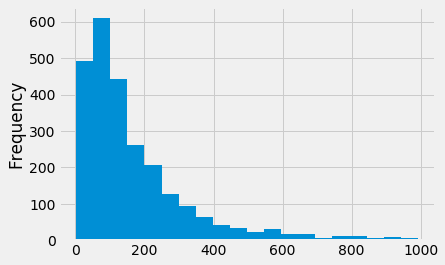

In [68]:
ted[ted['comments'] < 1000]['comments'].plot(kind = 'hist', bins = 20)
plt.show()

## Plot the number of talks that took place each year

In [69]:
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comment_per_view,view_per_comment
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226


In [78]:
ted['event'].unique()[-10:]

array(['TED2017', 'TEDxSkoll', 'TEDNairobi Ideas Search',
       'TEDxFulbrightDublin', 'TEDxOrcasIsland', 'TEDxPennsylvaniaAvenue',
       'TEDxCrenshaw', 'TEDxHamburg', 'TEDGlobal 2017', 'TEDxZurich'],
      dtype=object)

In [84]:
ted['event'].sample(10)                                          # .sample() method to random sampling obs

1973            TED2015
1073    TEDxOrangeCoast
819         TEDxMidwest
2515            TED2017
1648          TEDxMarin
1036     TEDGlobal 2011
1376            TED2012
756      TEDGlobal 2010
142             TED2007
1291     TEDGlobal 2012
Name: event, dtype: object

In [153]:
ted['film_date']

0       1140825600
1       1140825600
2       1140739200
3       1140912000
4       1140566400
           ...    
2545    1496707200
2546    1492992000
2547    1492992000
2548    1499472000
2549    1492992000
Name: film_date, Length: 2550, dtype: int64

In [154]:
import datetime

lst = []
for i in ted['film_date']:
    date_time = datetime.datetime.fromtimestamp(i).strftime('%Y-%m-%d %H:%M:%S')
    year = date_time[:4]
    lst.append(year)

In [155]:
type(lst)

list

In [156]:
series = pd.Series(lst)

In [157]:
ted['year'] = series

In [158]:
ted[:3]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,comment_per_view,view_per_comment,dt,year,dt_2
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2017-09-22 23:00:22,2006,2006-02-25
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2017-09-22 23:00:22,2006,2006-02-25
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226,2017-09-22 23:00:22,2006,2006-02-24


In [161]:
talk_nums = ted.groupby('year').count()['comments']

In [162]:
talk_nums

year
1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: comments, dtype: int64

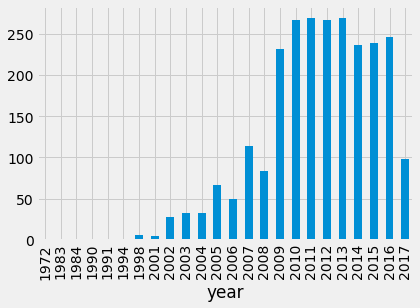

In [163]:
talk_nums.plot(kind = 'bar')
plt.show()

In [125]:
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,comment_per_view,view_per_comment,dt,year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2017-09-22 23:00:22,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2017-09-22 23:00:22,2006
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226,2017-09-22 23:00:22,2006


In [127]:
pd.to_datetime(ted['film_date'])               # this not working since it's a unix timestamp

0      1970-01-01 00:00:01.140825600
1      1970-01-01 00:00:01.140825600
2      1970-01-01 00:00:01.140739200
3      1970-01-01 00:00:01.140912000
4      1970-01-01 00:00:01.140566400
                    ...             
2545   1970-01-01 00:00:01.496707200
2546   1970-01-01 00:00:01.492992000
2547   1970-01-01 00:00:01.492992000
2548   1970-01-01 00:00:01.499472000
2549   1970-01-01 00:00:01.492992000
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [128]:
pd.to_datetime(ted['film_date'], unit = 's')    

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [131]:
ted['dt_2'] = pd.to_datetime(ted['film_date'], unit = 's')

In [147]:
ted[['dt_2', 'event']].sample(5)

,dt_2,event
1069,2011-09-05,TEDxBoulder 2011
453,2009-02-06,TED2009
544,2009-07-24,TEDGlobal 2009
2037,2015-05-28,TEDWomen 2015
751,2010-08-19,RSA Animate


In [151]:
ted['dt_2'].dt.year                      # .dt namespace  

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
2545    2017
2546    2017
2547    2017
2548    2017
2549    2017
Name: dt_2, Length: 2550, dtype: int64

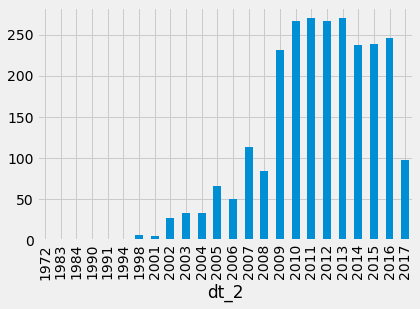

In [167]:
ted['event'].groupby(ted['dt_2'].dt.year).count().plot(kind = 'bar')
plt.show()

In [171]:
ted['dt_2'].dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: dt_2, dtype: int64

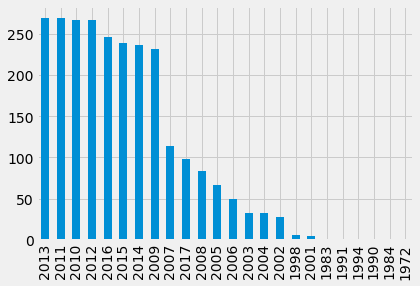

In [173]:
ted['dt_2'].dt.year.value_counts().plot(kind = 'bar')
plt.show()

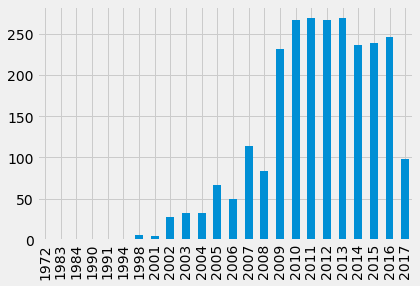

In [181]:
ted['dt_2'].dt.year.value_counts().sort_index().plot(kind = 'bar')
plt.show()

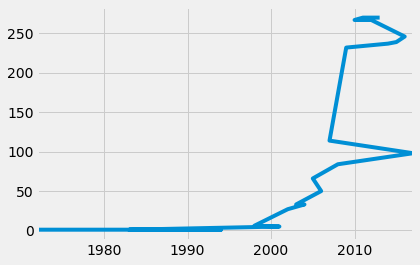

In [178]:
ted['dt_2'].dt.year.value_counts().plot(kind = 'line')
plt.show()

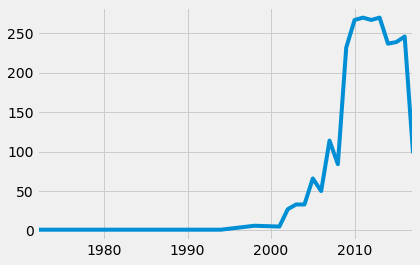

In [179]:
ted['dt_2'].dt.year.value_counts().sort_index().plot(kind = 'line')
plt.show()

In [180]:
ted['dt_2'].max()

Timestamp('2017-08-27 00:00:00')

## What were the "best" events in TED history to attend?

In [183]:
ted[:3]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,comment_per_view,view_per_comment,dt,year,dt_2
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2017-09-22 23:00:22,2006,2006-02-25
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2017-09-22 23:00:22,2006,2006-02-25
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226,2017-09-22 23:00:22,2006,2006-02-24


In [185]:
ted['event'].sample(10)

2090    TED Fellows Retreat 2015
1706                     TED2014
183               TEDGlobal 2005
1877              TEDGlobal 2014
1977        TEDxMuncyStatePrison
1315              TEDGlobal 2012
1229                     TEDxSMU
2235                     TED2016
1835        TEDSalon Berlin 2014
906                      TED2011
Name: event, dtype: object

In [195]:
ted['event'].unique()[-3:]

array(['TEDxHamburg', 'TEDGlobal 2017', 'TEDxZurich'], dtype=object)

In [224]:
ted.groupby('event')['views'].mean().sort_values()[-5:]

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [242]:
event_mean = ted.groupby('event')['views'].mean().sort_values()

In [250]:
event_mean.sort_index(inplace = True)

In [251]:
event_mean

event
AORN Congress                   149818.0
Arbejdsglaede Live              971594.0
BBC TV                          521974.0
Bowery Poetry Club              676741.0
Business Innovation Factory     304086.0
                                 ...    
The Do Lectures                 112321.0
Toronto Youth Corps            1028630.0
University of California        261831.5
Web 2.0 Expo 2008               757791.0
World Science Festival         3302312.0
Name: views, Length: 355, dtype: float64

In [280]:
mean_lst = event_mean.tolist()

In [270]:
name_lst = event_mean.index

In [271]:
name_lst

Index(['AORN Congress', 'Arbejdsglaede Live', 'BBC TV', 'Bowery Poetry Club',
       'Business Innovation Factory', 'Carnegie Mellon University',
       'Chautauqua Institution', 'DICE Summit 2010', 'DLD 2007', 'EG 2007',
       ...
       'TEDxZurich', 'TEDxZurich 2011', 'TEDxZurich 2012', 'TEDxZurich 2013',
       'Taste3 2008', 'The Do Lectures', 'Toronto Youth Corps',
       'University of California', 'Web 2.0 Expo 2008',
       'World Science Festival'],
      dtype='object', name='event', length=355)

In [262]:
ted.groupby('event')['event'].value_counts()

event                        event                      
AORN Congress                AORN Congress                  1
Arbejdsglaede Live           Arbejdsglaede Live             1
BBC TV                       BBC TV                         1
Bowery Poetry Club           Bowery Poetry Club             1
Business Innovation Factory  Business Innovation Factory    3
                                                           ..
The Do Lectures              The Do Lectures                1
Toronto Youth Corps          Toronto Youth Corps            1
University of California     University of California       2
Web 2.0 Expo 2008            Web 2.0 Expo 2008              1
World Science Festival       World Science Festival         1
Name: event, Length: 355, dtype: int64

In [263]:
event_count = ted.groupby('event')['event'].value_counts()

In [264]:
event_count

event                        event                      
AORN Congress                AORN Congress                  1
Arbejdsglaede Live           Arbejdsglaede Live             1
BBC TV                       BBC TV                         1
Bowery Poetry Club           Bowery Poetry Club             1
Business Innovation Factory  Business Innovation Factory    3
                                                           ..
The Do Lectures              The Do Lectures                1
Toronto Youth Corps          Toronto Youth Corps            1
University of California     University of California       2
Web 2.0 Expo 2008            Web 2.0 Expo 2008              1
World Science Festival       World Science Festival         1
Name: event, Length: 355, dtype: int64

In [265]:
event_count.sort_index(inplace = True)

In [266]:
event_count

event                        event                      
AORN Congress                AORN Congress                  1
Arbejdsglaede Live           Arbejdsglaede Live             1
BBC TV                       BBC TV                         1
Bowery Poetry Club           Bowery Poetry Club             1
Business Innovation Factory  Business Innovation Factory    3
                                                           ..
The Do Lectures              The Do Lectures                1
Toronto Youth Corps          Toronto Youth Corps            1
University of California     University of California       2
Web 2.0 Expo 2008            Web 2.0 Expo 2008              1
World Science Festival       World Science Festival         1
Name: event, Length: 355, dtype: int64

In [272]:
count_lst = event_count.tolist()

In [293]:
mean_count_together = pd.DataFrame([mean_lst, count_lst], columns = name_lst, index = ['mean', 'count'])

In [299]:
mean_count_together = mean_count_together.transpose()

In [300]:
mean_count_together

,mean,count
event,,
AORN Congress,149818.0,1.0
Arbejdsglaede Live,971594.0,1.0
BBC TV,521974.0,1.0
Bowery Poetry Club,676741.0,1.0
Business Innovation Factory,304086.0,3.0
...,...,...
The Do Lectures,112321.0,1.0
Toronto Youth Corps,1028630.0,1.0
University of California,261831.5,2.0


In [302]:
mean_count_together.sort_values('mean',  inplace = True)

In [303]:
mean_count_together[-5:]

,mean,count
event,,
TEDxNorrkoping,6569493.0,1.0
TEDxCreativeCoast,8444981.0,1.0
TEDxBloomington,9484259.5,2.0
TEDxHouston,16140250.5,2.0
TEDxPuget Sound,34309432.0,1.0


In [238]:
ted.groupby('event')['views'].agg(['mean', 'count']).sort_values('mean')[-5:]

,mean,count
event,,
TEDxNorrkoping,6569493.0,1
TEDxCreativeCoast,8444981.0,1
TEDxBloomington,9484259.5,2
TEDxHouston,16140250.5,2
TEDxPuget Sound,34309432.0,1


In [304]:
ted.groupby('event')['views'].agg(['mean', 'count', 'sum']).sort_values('sum')[-5:]

,mean,count,sum
event,,,
TED2006,3.274345e+06,45,147345533
TED2015,2.011017e+06,75,150826305
TEDGlobal 2013,2.584163e+06,66,170554736
TED2014,2.072874e+06,84,174121423
TED2013,2.302700e+06,77,177307937


##  Unpack the ratings data

In [305]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comment_per_view', 'view_per_comment', 'dt', 'year',
       'dt_2'],
      dtype='object')

In [306]:
ted['ratings']

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, Length: 2550, dtype: object

In [307]:
ted['ratings'][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [308]:
type(ted['ratings'][0])

str

In [311]:
ted['ratings'][0][0:19]

"[{'id': 7, 'name': "

In [312]:
ted['ratings'][0].split('{')

['[',
 "'id': 7, 'name': 'Funny', 'count': 19645}, ",
 "'id': 1, 'name': 'Beautiful', 'count': 4573}, ",
 "'id': 9, 'name': 'Ingenious', 'count': 6073}, ",
 "'id': 3, 'name': 'Courageous', 'count': 3253}, ",
 "'id': 11, 'name': 'Longwinded', 'count': 387}, ",
 "'id': 2, 'name': 'Confusing', 'count': 242}, ",
 "'id': 8, 'name': 'Informative', 'count': 7346}, ",
 "'id': 22, 'name': 'Fascinating', 'count': 10581}, ",
 "'id': 21, 'name': 'Unconvincing', 'count': 300}, ",
 "'id': 24, 'name': 'Persuasive', 'count': 10704}, ",
 "'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, ",
 "'id': 25, 'name': 'OK', 'count': 1174}, ",
 "'id': 26, 'name': 'Obnoxious', 'count': 209}, ",
 "'id': 10, 'name': 'Inspiring', 'count': 24924}]"]

In [316]:
string_1 = '[1, 2, 3]'

In [317]:
print(string_1)

[1, 2, 3]


In [318]:
type(string_1)

str

In [319]:
lst = ast.literal_eval('[1, 2, 3]')

In [320]:
print(lst)

[1, 2, 3]


In [321]:
type(lst)

list

In [322]:
ast.literal_eval(ted['ratings'][0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [323]:
ast.literal_eval(ted['ratings'][0])[0]

{'id': 7, 'name': 'Funny', 'count': 19645}

In [329]:
def str_to_lst(str):
    return ast.literal_eval(str)

In [330]:
str_to_lst(ted['ratings'][2])

[{'id': 7, 'name': 'Funny', 'count': 964},
 {'id': 3, 'name': 'Courageous', 'count': 45},
 {'id': 9, 'name': 'Ingenious', 'count': 183},
 {'id': 1, 'name': 'Beautiful', 'count': 60},
 {'id': 21, 'name': 'Unconvincing', 'count': 104},
 {'id': 11, 'name': 'Longwinded', 'count': 78},
 {'id': 8, 'name': 'Informative', 'count': 395},
 {'id': 10, 'name': 'Inspiring', 'count': 230},
 {'id': 22, 'name': 'Fascinating', 'count': 166},
 {'id': 2, 'name': 'Confusing', 'count': 27},
 {'id': 25, 'name': 'OK', 'count': 146},
 {'id': 24, 'name': 'Persuasive', 'count': 230},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 54},
 {'id': 26, 'name': 'Obnoxious', 'count': 142}]

In [346]:
ted['ratings'] = ted['ratings'].apply(ast.literal_eval)             #   here directly using ast.literal_eval() as input of .apply()

In [347]:
ted['ratings'][2]

[{'id': 7, 'name': 'Funny', 'count': 964},
 {'id': 3, 'name': 'Courageous', 'count': 45},
 {'id': 9, 'name': 'Ingenious', 'count': 183},
 {'id': 1, 'name': 'Beautiful', 'count': 60},
 {'id': 21, 'name': 'Unconvincing', 'count': 104},
 {'id': 11, 'name': 'Longwinded', 'count': 78},
 {'id': 8, 'name': 'Informative', 'count': 395},
 {'id': 10, 'name': 'Inspiring', 'count': 230},
 {'id': 22, 'name': 'Fascinating', 'count': 166},
 {'id': 2, 'name': 'Confusing', 'count': 27},
 {'id': 25, 'name': 'OK', 'count': 146},
 {'id': 24, 'name': 'Persuasive', 'count': 230},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 54},
 {'id': 26, 'name': 'Obnoxious', 'count': 142}]

In [348]:
type(ted['ratings'][2])

list

In [353]:
ratings_lst = ted['ratings'].tolist()

In [355]:
ratings_lst[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

## Count the total number of ratings received by each talk

In [356]:
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,comment_per_view,view_per_comment,dt,year,dt_2
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2017-09-22 23:00:22,2006,2006-02-25
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2017-09-22 23:00:22,2006,2006-02-25
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226,2017-09-22 23:00:22,2006,2006-02-24


In [358]:
ted.loc[0]['ratings']

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [359]:
ted.loc[0]['ratings'][1]

{'id': 1, 'name': 'Beautiful', 'count': 4573}

In [368]:
counted_lst = []
counted = 0
for i in ted.loc[0]['ratings']:
    counted += i['count']
counted_lst.append(counted)

In [369]:
print(counted_lst)

[93850]


In [372]:
counted_lst = []
counted = 0
for i in ted.loc[1]['ratings']:
    counted += i['count']
counted_lst.append(counted)

In [373]:
print(counted_lst)

[2936]


In [378]:
counted_lst = []

for j in range(ted.shape[0]):
    counted = 0
    for i in ted.loc[j]['ratings']:
        counted += i['count']
    counted_lst.append(counted)

In [380]:
counted_lst[:3]

[93850, 2936, 2824]

In [383]:
ted['num_ratings'] = counted_lst

In [384]:
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,title,url,views,comment_per_view,view_per_comment,dt,year,dt_2,num_count,num_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2017-09-22 23:00:22,2006,2006-02-25,93850,93850
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2017-09-22 23:00:22,2006,2006-02-25,2936,2936
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226,2017-09-22 23:00:22,2006,2006-02-24,2824,2824


In [385]:
ted.loc[0]['ratings']

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [389]:
ratings_lst[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [386]:
def get_num_ratings(lst):
    num = 0
    for i in lst:
        num += i['count']
    return num

In [391]:
get_num_ratings(ted.loc[0]['ratings'])

93850

In [392]:
get_num_ratings(ratings_lst[0])

93850

In [393]:
ted['ratings'].apply(get_num_ratings)

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: ratings, Length: 2550, dtype: int64

In [394]:
ted['num_ratings_2'] = ted['ratings'].apply(get_num_ratings)

In [395]:
ted[:3]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,url,views,comment_per_view,view_per_comment,dt,year,dt_2,num_count,num_ratings,num_ratings_2
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2017-09-22 23:00:22,2006,2006-02-25,93850,93850,93850
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2017-09-22 23:00:22,2006,2006-02-25,2936,2936,2936
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226,2017-09-22 23:00:22,2006,2006-02-24,2824,2824,2824


In [396]:
ted['num_ratings_2'].describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings_2, dtype: float64

In [397]:
ted['num_ratings'].describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

In [404]:
pd.DataFrame(ted['ratings'][0])['count'].sum()   # using DataFrame building from dict, this is awesome

93850

## Which occupations deliver the funniest TED talks on average?

In [405]:
ted.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,url,views,comment_per_view,view_per_comment,dt,year,dt_2,num_count,num_ratings,num_ratings_2
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2017-09-22 23:00:22,2006,2006-02-25,93850,93850,93850
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2017-09-22 23:00:22,2006,2006-02-25,2936,2936,2936


In [406]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comment_per_view', 'view_per_comment', 'dt', 'year',
       'dt_2', 'num_count', 'num_ratings', 'num_ratings_2'],
      dtype='object')

In [413]:
ted['ratings'][9]

[{'id': 21, 'name': 'Unconvincing', 'count': 838},
 {'id': 1, 'name': 'Beautiful', 'count': 767},
 {'id': 3, 'name': 'Courageous', 'count': 476},
 {'id': 9, 'name': 'Ingenious', 'count': 116},
 {'id': 11, 'name': 'Longwinded', 'count': 306},
 {'id': 2, 'name': 'Confusing', 'count': 111},
 {'id': 8, 'name': 'Informative', 'count': 304},
 {'id': 10, 'name': 'Inspiring', 'count': 2556},
 {'id': 22, 'name': 'Fascinating', 'count': 459},
 {'id': 7, 'name': 'Funny', 'count': 26},
 {'id': 24, 'name': 'Persuasive', 'count': 1543},
 {'id': 26, 'name': 'Obnoxious', 'count': 371},
 {'id': 25, 'name': 'OK', 'count': 245},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 209}]

In [415]:
for i in ted['ratings'][9]:
    if i['name'] == 'Funny':
        print(i['count'])

26


In [416]:
def get_funny_count(lst):
    for i in lst:
        if i['name'] == 'Funny':
            return i['count']

In [417]:
ted['ratings'].apply(get_funny_count)

0       19645
1         544
2         964
3          59
4        1390
        ...  
2545        1
2546       20
2547        1
2548       63
2549        0
Name: ratings, Length: 2550, dtype: int64

In [418]:
ted['funny_counts'] = ted['ratings'].apply(get_funny_count)

In [419]:
ted[:2]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,views,comment_per_view,view_per_comment,dt,year,dt_2,num_count,num_ratings,num_ratings_2,funny_counts
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,47227110,0.000096,10372.745443,2017-09-22 23:00:22,2006,2006-02-25,93850,93850,93850,19645
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,3200520,0.000083,12077.433962,2017-09-22 23:00:22,2006,2006-02-25,2936,2936,2936,544


In [420]:
ted.groupby('speaker_occupation')['funny_counts'].agg(['mean'])

,mean
speaker_occupation,
Chairman of the Cordoba Initiative,0.0
"Child protection leader, activist, author",1.0
Robotics engineer,1.0
Space physicist,19.0
3D printer,18.0
...,...
e-Patient,21.0
"inventor, engineer",21.0
medical inventor,8.0


In [427]:
ted.groupby('speaker_occupation')['funny_counts'].agg(['mean', 'count', 'sum']).sort_values('count')[-10:]

,mean,count,sum
speaker_occupation,,,
Filmmaker,158.952381,21,3338
Photographer,11.320000,25,283
Psychologist,437.961538,26,11387
Inventor,43.370370,27,1171
Architect,58.233333,30,1747
Entrepreneur,247.290323,31,7666
Journalist,77.787879,33,2567
Designer,118.470588,34,4028
Artist,128.205882,34,4359


In [432]:
ted['funny_counts_2'] = ted['ratings'].apply(get_funny_count)
ted.funny_counts_2.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_counts_2, dtype: int64

In [433]:
ted['funny_ratio'] = ted['funny_counts_2'] / ted['num_ratings']

In [434]:
ted[:2]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,view_per_comment,dt,year,dt_2,num_count,num_ratings,num_ratings_2,funny_counts,funny_counts_2,funny_ratio
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,10372.745443,2017-09-22 23:00:22,2006,2006-02-25,93850,93850,93850,19645,19645,0.209323
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,12077.433962,2017-09-22 23:00:22,2006,2006-02-25,2936,2936,2936,544,544,0.185286


In [440]:
ted[['funny_ratio', 'speaker_occupation']].sort_values('funny_ratio')[-20:]

,funny_ratio,speaker_occupation
1849,0.468405,Science humorist
337,0.480855,Comedian
124,0.495968,"Performance poet, multimedia artist"
315,0.497920,Expert
1168,0.502117,Social energy entrepreneur
1468,0.502935,Ornithologist
595,0.503542,"Comedian, voice artist"
1534,0.511628,Cartoon editor
97,0.512383,Satirist
2297,0.515152,"Actor, writer"


In [442]:
ted[['funny_ratio', 'speaker_occupation']].sort_values('funny_ratio')[:20]

,funny_ratio,speaker_occupation
2549,0.0,Game designer
1612,0.0,Biologist
612,0.0,Sculptor
998,0.0,Penguin expert
593,0.0,Engineer
284,0.0,Space activist
1041,0.0,Biomedical engineer
1618,0.0,Spinal cord researcher
2132,0.0,Computational geneticist
442,0.0,Sculptor


In [443]:
ted_funny = ted[['funny_ratio', 'speaker_occupation']]

In [444]:
ted_funny

,funny_ratio,speaker_occupation
0,0.209323,Author/educator
1,0.185286,Climate advocate
2,0.341360,Technology columnist
3,0.015826,Activist for environmental justice
4,0.054254,Global health expert; data visionary
...,...,...
2545,0.005208,Journalist
2546,0.132450,Astrobiologist
2547,0.007353,Robotics engineer
2548,0.108062,Public intellectual


In [452]:
ted_funny.groupby("speaker_occupation")['funny_ratio'].agg(['mean', 'count']).sort_values('mean')[-20:]

,mean,count
speaker_occupation,,
Cartoonist,0.369335,1
YouTube trends manager,0.404886,1
"Entrepreneur, Lego enthusiast",0.409814,1
First aid instructor,0.413043,1
Expert,0.415295,2
Philosopher-comic,0.415871,1
Marketing expert,0.434353,1
Pranksters,0.437240,1
African grey parrot,0.441525,1


In [466]:
ted['speaker_occupation'].describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

In [467]:
ted['speaker_occupation'].value_counts()

Writer                                       45
Artist                                       34
Designer                                     34
Journalist                                   33
Entrepreneur                                 31
                                             ..
Historian of technology and culture           1
Stem cell research advocate                   1
Gentleman thief                               1
Musician, Conductor                           1
Broadcast personality, politician, author     1
Name: speaker_occupation, Length: 1458, dtype: int64

In [468]:
occupation_counts = ted['speaker_occupation'].value_counts()

In [469]:
type(occupation_counts)

pandas.core.series.Series

In [470]:
occupation_counts

Writer                                       45
Artist                                       34
Designer                                     34
Journalist                                   33
Entrepreneur                                 31
                                             ..
Historian of technology and culture           1
Stem cell research advocate                   1
Gentleman thief                               1
Musician, Conductor                           1
Broadcast personality, politician, author     1
Name: speaker_occupation, Length: 1458, dtype: int64

In [471]:
occupation_counts >= 5

Writer                                        True
Artist                                        True
Designer                                      True
Journalist                                    True
Entrepreneur                                  True
                                             ...  
Historian of technology and culture          False
Stem cell research advocate                  False
Gentleman thief                              False
Musician, Conductor                          False
Broadcast personality, politician, author    False
Name: speaker_occupation, Length: 1458, dtype: bool

In [474]:
top_occupation = occupation_counts[occupation_counts >= 5].index

In [475]:
top_occupation

Index(['Writer', 'Artist', 'Designer', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       'Educator', 'Economist', 'Neuroscientist', 'Author', 'Roboticist',
       'Philosopher', 'Biologist', 'Physicist', 'Marine biologist', 'Musician',
       'Technologist', 'Activist', 'Global health expert; data visionary',
       'Behavioral economist', 'Historian', 'Graphic designer', 'Astronomer',
       'Oceanographer', 'Singer/songwriter', 'Philanthropist', 'Poet',
       'Novelist', 'Computer scientist', 'Futurist', 'Engineer',
       'Social psychologist', 'Mathematician', 'Astrophysicist',
       'Performance poet, multimedia artist', 'Social entrepreneur',
       'Evolutionary biologist', 'Reporter', 'Photojournalist',
       'Writer, activist', 'Legal activist', 'Techno-illusionist',
       'Singer-songwriter', 'Climate advocate', 'Comedian', 'Tech visionary',
       'Violinist', 'Social Media Theorist', 'Cartoonist', 'Paleonto

In [478]:
ted_top_subset = ted_funny[ted_funny['speaker_occupation'].isin(top_occupation)]

In [479]:
ted_top_subset.head(3)

,funny_ratio,speaker_occupation
1,0.185286,Climate advocate
4,0.054254,Global health expert; data visionary
7,0.008789,Architect


In [481]:
ted_top_subset.shape

(786, 2)

In [480]:
ted_top_subset.groupby("speaker_occupation")['funny_ratio'].agg(['mean', 'count']).sort_values('mean')[-20:]

,mean,count
speaker_occupation,,
Science writer,0.055993,5
Designer,0.059287,34
Writer,0.060745,45
Game designer,0.062317,5
Reporter,0.066250,6
Evolutionary biologist,0.069157,6
Novelist,0.070876,8
Entrepreneur,0.073295,31
Author,0.075508,20


In [483]:
ted_top_subset.groupby("speaker_occupation")['funny_ratio'].agg(['mean', 'count']).sort_values('mean')[:10]

,mean,count
speaker_occupation,,
Surgeon,0.002465,5
Physician,0.004515,5
Photojournalist,0.004908,6
Investor and advocate for moral leadership,0.005198,5
Photographer,0.007152,25
"Environmentalist, futurist",0.007317,5
Violinist,0.009534,5
Singer-songwriter,0.010597,6
Chemist,0.010970,5
